In [2]:
from lda2vec import preprocess, Corpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

You must be using a very recent version of pyLDAvis to use the lda2vec outputs. 
As of this writing, anything past Jan 6 2016 or this commit `14e7b5f60d8360eb84969ff08a1b77b365a5878e` should work.
You can do this quickly by installing it directly from master like so:


In [3]:
# pip install git+https://github.com/bmabey/pyLDAvis.git@master#egg=pyLDAvis

In [4]:
import pyLDAvis
pyLDAvis.enable_notebook()

### Reading in the saved model topics

After runnning `lda2vec_run.py` script in `examples/twenty_newsgroups/lda2vec` directory a `topics.pyldavis.npz` will be created that contains the topic-to-word probabilities and frequencies. What's left is to visualize and label each topic from the it's prevalent words.

In [6]:
npz = np.load(open('topics.pyldavis.npz', 'rb'))
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()
# dat['term_frequency'] = dat['term_frequency'] * 1.0 / dat['term_frequency'].sum()

/home/james/src/lda2vec/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/james/src/lda2vec/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: NpzFile.iteritems is deprecated in python 3, to match the removal of dict.itertems. Use .items() instead.
  


In [13]:
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print(msg)
    topic_to_topwords[j] = top_words

Topic 0 interested available unit in more this viewing tell ? you
Topic 1 and we the .  but to i away old
Topic 2 account money na order portal  letter n’t the pick
Topic 3 this viewing in available interested street unit listing apartment am
Topic 4 viewing this available in street apartment interested unit please ?
Topic 5 this viewing in possible tomorrow to see apartment view very
Topic 6 in looking . and for a the move  ,
Topic 7 what ? the included rent is have for / month
Topic 8 in 1 more looking interested - move bedroom am unit
Topic 9 the what ? you for how is have i available
Topic 10 the   rent how have what do that ?
Topic 11 the it  application that  to i was and
Topic 12 ? what  :  is / the for you
Topic 13 we  . ( to ,  and the )
Topic 14 this viewing in interested street available apartment unit possible .
Topic 15 to i back . we meeting and but the for
Topic 16 liability charged  pay prorated the package portal payment amount
Topic 17  the pay that  and away but we l

/home/james/src/lda2vec/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualize topics

In [14]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')

/home/james/src/lda2vec/env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
pyLDAvis.display(prepared_data)

### 'True' topics

The 20 newsgroups dataset is interesting because users effetively classify the topics by posting to a particular newsgroup. This lets us qualitatively check our unsupervised topics with the 'true' labels. For example, the four topics we highlighted above are intuitively close to comp.graphics, sci.med, talk.politics.misc, and sci.space.

    comp.graphics
    comp.os.ms-windows.misc
    comp.sys.ibm.pc.hardware
    comp.sys.mac.hardware
    comp.windows.x    
    rec.autos
    rec.motorcycles
    rec.sport.baseball
    rec.sport.hockey    
    sci.crypt
    sci.electronics
    sci.med
    sci.space
    misc.forsale    
    talk.politics.misc
    talk.politics.guns
    talk.politics.mideast    
    talk.religion.misc
    alt.atheism
    soc.religion.christian

### Individual document topics

In [248]:
from sklearn.datasets import fetch_20newsgroups
remove=('headers', 'footers', 'quotes')
texts = fetch_20newsgroups(subset='train', remove=remove).data

#### First Example

In [249]:
print texts[1]

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.


In [250]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][1]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text)

03% in topic 00 which has top words x11r5, xv, window, xterm, server, motif, font, xlib, //, sunos
03% in topic 03 which has top words leafs, games, playoffs, hockey, game, players, pens, yankees, bike, phillies
22% in topic 08 which has top words mac, controller, shipping, disk, printer, mb, ethernet, enable, os/2, port
41% in topic 13 which has top words mac, i, thanks, monitor, apple, upgrade, card, connect, using, windows
21% in topic 14 which has top words i, quadra, monitor, my, apple, duo, hard drive, mac, mouse, thanks
04% in topic 15 which has top words {, shipping, }, +, mac, mb, os/2, $, 3.5, manuals
03% in topic 18 which has top words revolver, tires, pitching, saturn, ball, trigger, car, ice, team, engine


<Container object of 20 artists>

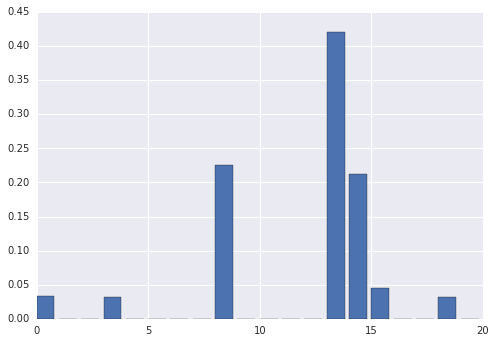

In [251]:
plt.bar(np.arange(20), dat['doc_topic_dists'][1])

#### Second Example

In [255]:
print texts[51]

I have been following this thread on talk.religion,
soc.religion.christian.bible-study and here with interest.  I am amazed at
the different non-biblical argument those who oppose the Sabbath present. 

One question comes to mind, especially since my last one was not answered
from Scripture.  Maybe clh may wish to provide the first response.

There is a lot of talk about the Sabbath of the TC being ceremonial. 
Answer this:

Since the TC commandments is one law with ten parts on what biblical
basis have you decided that only the Sabbath portion is ceremonial?
OR You say that the seventh-day is the Sabbath but not applicable to
Gentile Christians.  Does that mean the Sabbath commandment has been
annulled?  References please.

If God did not intend His requirements on the Jews to be applicable to
Gentile Christians why did He make it plain that the Gentiles were now
grafted into the commonwealth of Israel?

Darius


In [259]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][51]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text)

14% in topic 01 which has top words jesus, son, father, matthew, sin, mary, g'd, disciples, christ, sins
14% in topic 02 which has top words s1, nsa, s2, clipper chip, administration, q, escrow, private sector, serial number, encryption technology
09% in topic 07 which has top words nsa, escrow, clipper chip, encryption, government, phones, warrant, vat, decrypt, wiretap
11% in topic 10 which has top words obfuscated, =, ciphertext, jesus, gentiles, matthew, judas, {, x, int
20% in topic 11 which has top words jesus, ra, bobby, faith, god, homosexuality, bible, sin, msg, islam
17% in topic 12 which has top words jesus, sin, scripture, matthew, christ, islam, god, sins, prophet, faith
05% in topic 17 which has top words :>, taxes, guns, flame, .., clinton, kids, jobs, hey, drugs
05% in topic 19 which has top words stephanopoulos, leafs, mamma, karabagh, mr., koresh, apartment, fired, myers, sumgait


<Container object of 20 artists>

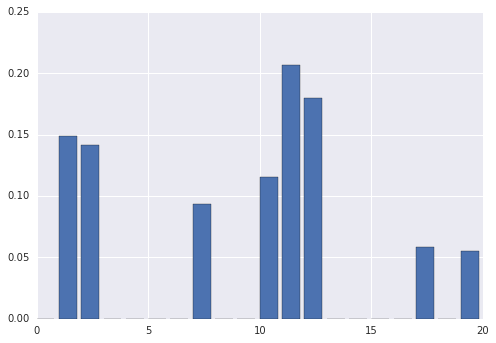

In [260]:
plt.bar(np.arange(20), dat['doc_topic_dists'][51])